# Planning 

## Reference
[Link](https://www.kaggle.com/bhadaneeraj/cardio-vascular-disease-detection) to Kaggle Project.

## The Problem Statement:
To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.

## Features:

Age | Objective Feature | age | int (days)  
Height | Objective Feature | height | int (cm) |  
Weight | Objective Feature | weight | float (kg) |  
Gender | Objective Feature | gender | categorical code |   
Systolic blood pressure | Examination Feature | ap_hi | int |    
Diastolic blood pressure | Examination Feature | ap_lo | int |  
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |  
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |  
Smoking | Subjective Feature | smoke | binary |  
Alcohol intake | Subjective Feature | alco | binary |  
Physical activity | Subjective Feature | active | binary |  
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |  

# Import libraries

In [45]:
import pandas as pd
import numpy as np
from IPython.display import Image
import seaborn as sns

import matplotlib as plt
import matplotlib.pyplot as plt

# Loading dataset

In [2]:
data_raw = pd.read_csv('dataset/cardio_train.csv', delimiter=';')

# Descriptive analysis

## Dimensions

In [3]:
data_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
data_raw.shape

(69301, 13)

## Renaming columns

In [5]:
data_raw.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
data_raw.columns = ['id', 'age', 'gender', 'height', 'weight', 'sys_press', 'dia_press',
                    'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

In [7]:
data_raw.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'sys_press', 'dia_press',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

## Feature engineering

### Changing `age` from days to years

In [8]:
data_raw['age_year'] = data_raw['age'].apply(lambda x: x/365)

In [9]:
data_raw.sample(3)

,id,age,gender,height,weight,sys_press,dia_press,cholesterol,gluc,smoke,alco,active,cardio,age_year
66387,95769,20519,2,162,70.0,130,90,1,1,0,0,1,1,56.216438
13425,20160,16947,1,169,86.0,140,90,2,1,0,1,1,1,46.430137
4105,6802,23173,1,160,96.0,130,90,1,1,0,0,0,1,63.487671


In [10]:
data_raw.drop('age', axis=1,inplace=True)

In [11]:
data_raw.sample(3)

,id,gender,height,weight,sys_press,dia_press,cholesterol,gluc,smoke,alco,active,cardio,age_year
13064,19648,2,168,67.0,130,80,2,1,0,1,1,0,56.687671
636,1875,1,158,65.0,130,80,1,1,0,0,1,1,61.739726
63756,92009,2,170,72.0,150,90,2,1,1,1,1,1,56.060274


In [12]:
data_raw.rename(columns={'age_year': 'age'}, inplace=True)

In [13]:
data_raw.sample(3)

,id,gender,height,weight,sys_press,dia_press,cholesterol,gluc,smoke,alco,active,cardio,age
42940,62351,1,158,68.0,110,80,1,1,0,0,1,1,46.123288
65556,94579,1,153,83.0,130,90,1,1,0,0,1,0,62.167123
43228,62763,1,173,98.0,140,90,1,1,0,0,1,1,55.991781


In [14]:
# round `age` values to 1 decimal
data_raw['age'] = data_raw['age'].apply( lambda x: np.round(x, 1) )

In [15]:
data_raw.sample(3)

,id,gender,height,weight,sys_press,dia_press,cholesterol,gluc,smoke,alco,active,cardio,age
7749,12059,1,154,78.0,120,80,1,1,0,0,1,0,43.5
45945,66595,1,162,50.0,120,80,1,1,0,0,0,0,43.6
62902,90817,1,166,70.0,110,70,1,1,0,0,1,0,45.3


## Checking NA 

In [16]:
data_raw.isna().sum()

id             0
gender         0
height         0
weight         0
sys_press      0
dia_press      0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age            0
dtype: int64

## Descriptive statistics

### Numerical attributes

In [17]:
data_raw.dtypes 

id               int64
gender           int64
height           int64
weight         float64
sys_press        int64
dia_press        int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
age            float64
dtype: object

In [18]:
ct1 = pd.DataFrame( data_raw.apply ( np.mean) ).T 
ct2 = pd.DataFrame( data_raw.apply ( np.median ) ).T

d1 = pd.DataFrame( data_raw.apply( np.std )).T
d2 = pd.DataFrame( data_raw.apply( min )).T
d3 = pd.DataFrame( data_raw.apply( max )).T
d4 = pd.DataFrame( data_raw.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame( data_raw.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame( data_raw.apply( lambda x: x.kurtosis() )).T

m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()

# rename columns
m.columns = ["attributes","min","max","range","mean","median","std","skew","kurtosis"]
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,988.0,99999.0,99011.0,50471.480397,50494.0,28562.894266,-0.001317,-1.198215
1,gender,1.0,2.0,1.0,1.349519,1.0,0.476818,0.631203,-1.601629
2,height,55.0,250.0,195.0,164.362217,165.0,8.205278,-0.634040,7.860684
3,weight,10.0,200.0,190.0,74.203027,72.0,14.383365,1.005120,2.514805
4,sys_press,-150.0,16020.0,16170.0,128.829584,120.0,154.774688,84.886144,7506.346872
5,dia_press,-70.0,11000.0,11070.0,96.650092,80.0,189.094876,32.101546,1421.287364
6,cholesterol,1.0,3.0,2.0,1.366806,1.0,0.680265,1.587480,0.994715
7,gluc,1.0,3.0,2.0,1.226447,1.0,0.572242,2.397520,4.294805
8,smoke,0.0,1.0,1.0,0.088051,0.0,0.283369,2.907579,6.454200
9,alco,0.0,1.0,1.0,0.053881,0.0,0.225783,3.951845,13.617472


Duas variáveis binárias: somar agregado ou tabela de frequência

In [19]:
pd.crosstab( data_raw['smoke'], data_raw['cardio'] ).apply( lambda x: x / x.sum(), axis=1 )

cardio,0,1
smoke,,
0,0.498046,0.501954
1,0.524910,0.475090


De acordo com esses dados, a variável `smoke` parece não ser relevante para classificar indivíduos como saudáveis ou com doença cardiovascular. Investigaremos agora as outras variáveis binárias: `alco`, `gender` e `active`

In [20]:
pd.crosstab( data_raw['alco'], data_raw['cardio'] ).apply( lambda x: x / x.sum(), axis=1 )

cardio,0,1
alco,,
0,0.499550,0.500450
1,0.515533,0.484467


In [21]:
pd.crosstab( data_raw['gender'], data_raw['cardio'] ).apply( lambda x: x / x.sum(), axis=1 )

cardio,0,1
gender,,
1,0.50356,0.49644
2,0.49455,0.50545


In [22]:
pd.crosstab( data_raw['active'], data_raw['cardio'] ).apply( lambda x: x / x.sum(), axis=1 )

cardio,0,1
active,,
0,0.464370,0.535630
1,0.509198,0.490802


In [23]:
pd.crosstab( data_raw['gluc'], data_raw['cardio'] ).apply( lambda x: x / x.sum(), axis=1 )

cardio,0,1
gluc,,
1,0.519487,0.480513
2,0.406888,0.593112
3,0.378624,0.621376


In [24]:
pd.crosstab( data_raw['cholesterol'], data_raw['cardio'] ).apply( lambda x: x / x.sum(), axis=1 )

cardio,0,1
cholesterol,,
1,0.559941,0.440059
2,0.397523,0.602477
3,0.235508,0.764492


## Hypothesis Mind Map
Let's create some hypothesis to investigate the phenoma. Before doing that, we want to create a mind map of all elements (e.g. Person) and their attributes (e.g. age) so that we can use them to create the hypotheses (e.g. older people have higher probability of having a cardio disease) 

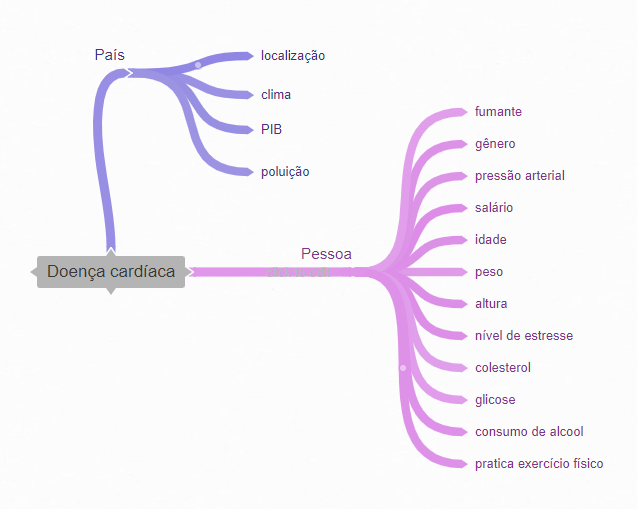

In [25]:
Image("images/coggle_mind_map.PNG")

Hypotheses:
* High cholesterol -> cardio disease
* High systolic blood pressure -> cardio disease
* High diastolic blood pressure -> cardio disease
* High glucose -> cardio disease
* Non active (0) -> cardio disease

## EDA (Exploratory data analysis) 
### Univariate analysis

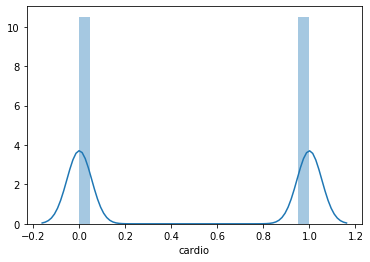

In [26]:
sns.distplot( data_raw['cardio'] );

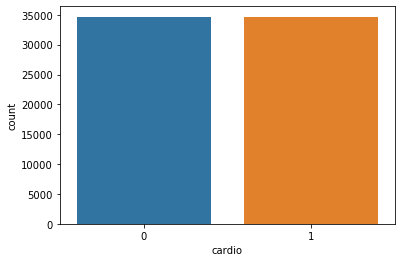

In [27]:
sns.countplot( data_raw['cardio'] );

High cholesterol -> cardio disease
High systolic blood pressure -> cardio disease
High diastolic blood pressure -> cardio disease
High glucose -> cardio disease
Non active (0) -> cardio disease

### Hypothesis tests

High cholesterol -> cardio disease

True

In [30]:
data_raw.columns

Index(['id', 'gender', 'height', 'weight', 'sys_press', 'dia_press',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age'],
      dtype='object')

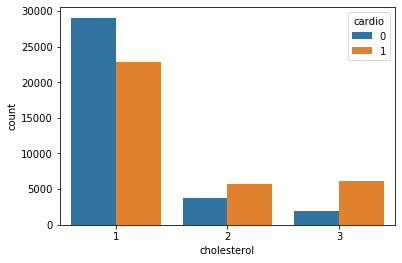

In [36]:
# countplot

sns.countplot( hue='cardio', x='cholesterol', data=data_raw );

High systolic blood pressure -> cardio disease

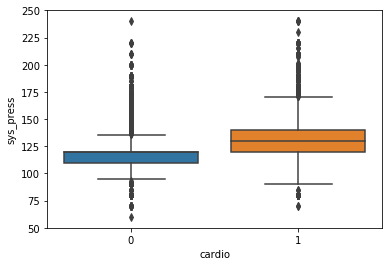

In [49]:
# boxplot

fig, ax = plt.subplots()
sns.boxplot( data=data_raw, x='cardio', y='sys_press', ax=ax);
ax.set_ylim(50, 250)
plt.show()

High diastolic blood pressure -> cardio disease

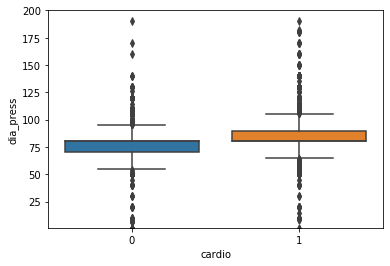

In [53]:
# boxplot

fig, ax = plt.subplots()
sns.boxplot( data=data_raw, x='cardio', y='dia_press', ax=ax);
ax.set_ylim(1, 200)
plt.show()

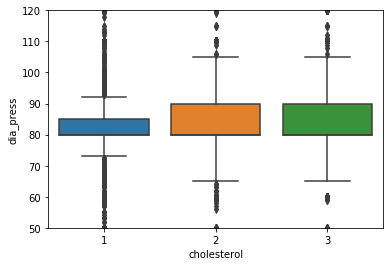

In [58]:
# cholesterol and sys_press

fig, ax = plt.subplots()
sns.boxplot( data=data_raw, x='cholesterol', y='dia_press', ax=ax);
ax.set_ylim(50, 120)
plt.show()

High glucose -> cardio disease

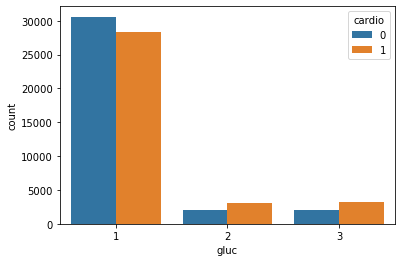

In [59]:
# countplot

sns.countplot( hue='cardio', x='gluc', data=data_raw );

Non active (0) -> cardio disease

In [69]:
pd.crosstab( data_raw['active'], data_raw['cardio'] ).apply( lambda x: x / x.sum(), axis=1 )

cardio,0,1
active,,
0,0.464370,0.535630
1,0.509198,0.490802


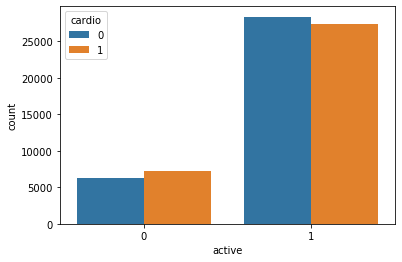

In [63]:
sns.countplot( hue='cardio', x='active', data=data_raw );

In [70]:
# Next steps:

# Choose 2 classification models
# Performance Metrics
# Fine tuning

## Backlog
* Study `sns.distplot`
    * What's the meaning of the `y` axis? How can the `density` be interpreted?  
* Search for a real cardiodisease dataset  
    * We believe the current dataset is not real
* Evaluate renaming some binary variables
* Check information about systolic and diastolic pressure